# Лабораторная работа №3
## Вариант 7

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt      
import re

%matplotlib inline
plt.style.use('fast')

## Задача 1

Требуется удалить все колонки с числовыми типами, оставив все строки

In [2]:
df_new = pd.read_csv("Data/seeds.csv")
print("Решение    : Имя колонки : Тип данных")
print("-----------:-------------:------------------------")
for col in df_new.columns:
    decision = "Оставлено "
    col_type = type(df_new[col][0])

    if(col_type in [np.float64, np.int64, int, float]):    
        decision = "Удалено   "
        del df_new[col]

    print(f"{decision} : {col.ljust(11)} : {col_type}")

Решение    : Имя колонки : Тип данных
-----------:-------------:------------------------
Удалено    : area        : <class 'numpy.float64'>
Удалено    : perim       : <class 'numpy.float64'>
Удалено    : compact     : <class 'numpy.float64'>
Удалено    : len         : <class 'numpy.float64'>
Удалено    : width       : <class 'numpy.float64'>
Удалено    : asym        : <class 'numpy.float64'>
Удалено    : grooveLen   : <class 'numpy.float64'>
Оставлено  : class       : <class 'str'>
Удалено    : region_id   : <class 'numpy.int64'>


In [3]:
df_new.head() # Первые 5 строк

,class
0,Kama
1,Kama
2,Kama
3,Kama
4,Kama


In [4]:
df_new.tail() # Последние 5 строк

,class
205,Canadian
206,Canadian
207,Canadian
208,Canadian
209,Canadian


In [5]:
df_new.to_csv('Data/result.csv', index=False)

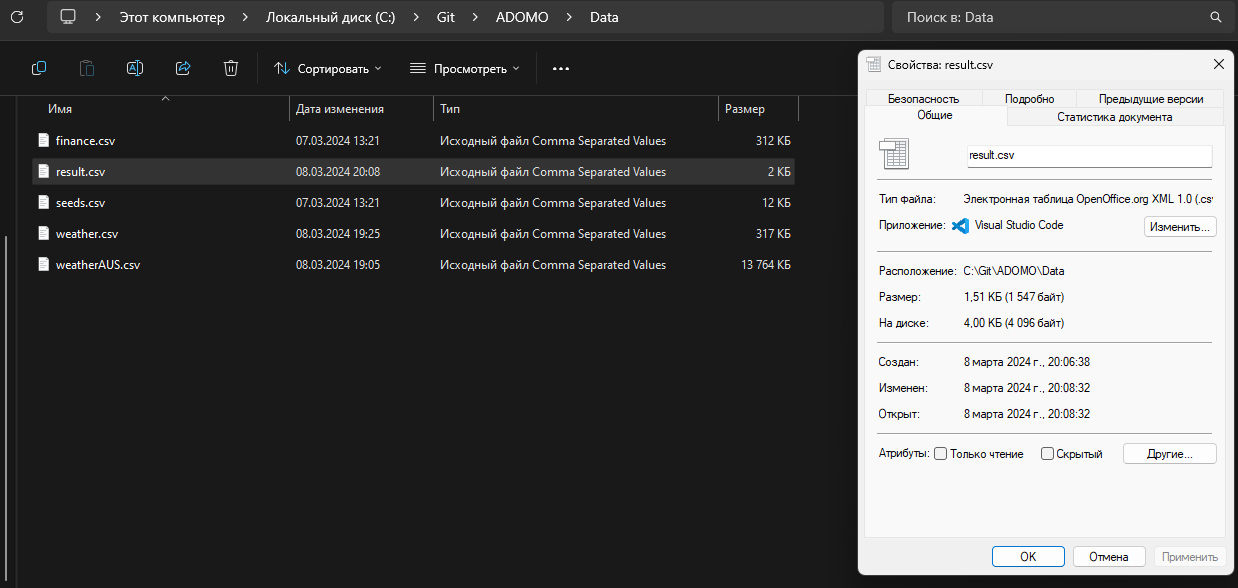

## Задача 2

In [6]:
df = pd.read_csv("Data/titanic.csv")
df.iloc[(df.index >= 19) & (df.index < 25)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250
20,0,2,Mr. Joseph J Fynney,male,35.0,0,0,26.0000
21,1,2,Mr. Lawrence Beesley,male,34.0,0,0,13.0000
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
23,1,1,Mr. William Thompson Sloper,male,28.0,0,0,35.5000
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750


Требуется удалить пассажиров второго класса в возрасте от 15 до 40 лет.

In [7]:
df = df.drop(df.loc[(df["Pclass"] == 2) & (df["Age"] >= 15) & (df["Age"] < 40)].index)
df.iloc[(df.index >= 19) & (df.index < 25)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
23,1,1,Mr. William Thompson Sloper,male,28.0,0,0,35.5000
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750


## Задача 3

In [8]:
df.head()[:4]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


In [9]:
df.tail()[1:5]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


Требуется переименовать колонку "Name" на синоним. Задание можно интерпретировать по-разному: можно переименовать имя колонки, или же можно переименовать занчения в колонке. Поэтому буду переименовывать как колонку, так и значения в ней.

Переименовыввем ФИО из формата "Mr FirstName MiddleName (Bla Bla Bla) LastName" в формат "LastName FirstName".
Пример "Мистер Анатолий Сергеевич (Джонни Сильверхенд) Иванов" станет "Иванов Анатолий". Преобразование выполняется с помощью лямбда-функции, состоящей из преобразования регулярного выражения строки в список с последующей конкатинацией среза списка.

Переименовываем колонку "Name" в "Short name".

In [10]:
df['Name'] = df['Name'].apply(lambda name:' '.join(list(reversed(re.sub(r'\([^)]*?\)', '', name).split()[1::2]))))
df = df.rename(columns={"Name": "Short name"})

df.head()[:4]

,Survived,Pclass,Short name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Braund Owen,male,22.0,1,0,7.2500
1,1,1,Cumings John,female,38.0,1,0,71.2833
2,1,3,Laina,female,26.0,0,0,7.9250
3,1,1,Futrelle Jacques,female,35.0,1,0,53.1000


In [11]:
df.tail()[1:5]

,Survived,Pclass,Short name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
883,1,1,Graham Margaret,female,19.0,0,0,30.00
884,0,3,Johnston Catherine,female,7.0,1,2,23.45
885,1,1,Behr Karl,male,26.0,0,0,30.00
886,0,3,Patrick,male,32.0,0,0,7.75


## Задача 4

Требуется вычислить долю женщин на борту (среди тех, кто отфильрован в задании 2)

In [12]:
print("Ответ:", round(df[df["Sex"] == "female"].Sex.count() / df.Sex.count(), 2))

Ответ: 0.35
